# Open PTU files
This notebook opens ".ptu" files.

## Set data path

In [31]:
from pathlib import Path
from matplotlib import pyplot as plt
import numpy as np
import napari

In [32]:
#data_path = "C:/Users/mazo260d/Desktop/Conni_BiA_PoL/copied_for_Marcelo/single_image/raw_FLIM_data/single_FLIM_image.ptu"
data_path = "C:/Users/cblei/Desktop/miniSabb_local/FLIM_file_formats/single_FLIM_image.ptu"

In [62]:
data_path = Path(data_path)
str(data_path)

'C:\\Users\\cblei\\Desktop\\miniSabb_local\\FLIM_file_formats\\single_FLIM_image.ptu'

## Open ptu file

https://github.com/SumeetRohilla/readPTU_FLIM

In [34]:
from readPTU_FLIM import PTUreader

In [35]:
ptu_file = PTUreader(data_path, print_header_data = False)

TCSPC Hardware: PicoHarpT3
Raw Data has been Read!



In [36]:
ptu_file._print_ptu_head()

Head ID                        Value   
File_GUID                      40      
File_CreatingTime              13301658052.442
$StartedByRemoteInterface      1       
Measurement_SubMode            3       
File_Comment                           
TTResult_StopReason            1       
Fast_Load_End                  0       
CreatorSW_Name                 SymPhoTime 64
CreatorSW_Version              1.6     
CreatorSW_SVNBuild             3224    
CreatorSW_Modules              0       
$ReqHdr_RecordVersion          16777728
$ReqHdr_MeasurementType        1       
$ReqHdr_PixelNumber_X          512     
$ReqHdr_PixelNumber_Y          512     
$ReqHdr_ScanningPattern        0       
$ReqHdr_SpatialResolution      0.07035765166
$Filename                      single_FLIM_image
$Comment                               
$Groupname                     single_FLIM_image
ImgHdr_Dimensions              3       
ImgHdr_Ident                   3       
ImgHdr_PixX                    512     
ImgHd

## get FLIM data

In [37]:
flim_data_stack, intensity_image = ptu_file.get_flim_data_stack()

In [38]:
flim_data_stack.shape

(512, 512, 2, 270)

In [39]:
intensity_image.shape

(512, 512)

## plot intensity image

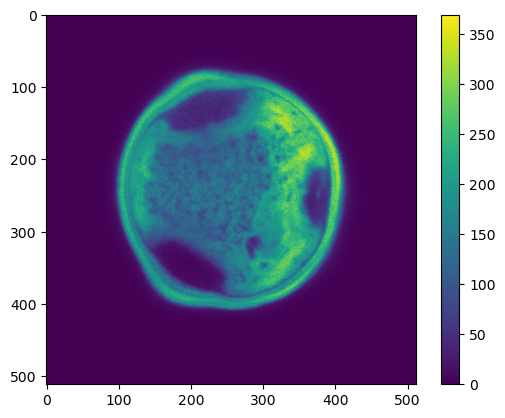

In [40]:
plt.imshow(intensity_image)
plt.colorbar()

## Display in napari

Re-arange axes to have (x,y) by the end

In [41]:
flim_data_stack_for_napari = np.moveaxis(flim_data_stack, [0, 1], [-2, -1])

Get only first channel (the second channel for this image is empty)

In [42]:
flim_data_stack_for_napari = flim_data_stack_for_napari[0, :, :, :]

In [43]:
flim_data_stack_for_napari.shape

(270, 512, 512)

Open napari viewer

In [44]:
viewer = napari.Viewer()

Add image (time-series) to napari

In [45]:
viewer.add_image(flim_data_stack_for_napari)

<Image layer 'flim_data_stack_for_napari' at 0x1aa96c3d640>

## Plot pixel over time

In [46]:
total_time_points = flim_data_stack_for_napari.shape[0]
total_time_points

270

In [47]:
laser_frequency = 40 # MHz
laser_time_window = 1 / (laser_frequency * 10**6)
laser_time_window_ns = laser_time_window * 10**9
laser_time_window_ns

25.0

In [48]:
pixel = flim_data_stack_for_napari[:,150,300]

In [49]:
time_step = laser_time_window_ns / total_time_points # ns
time_step

0.09259259259259259

In [50]:
time_array = np.arange(0, total_time_points) * time_step

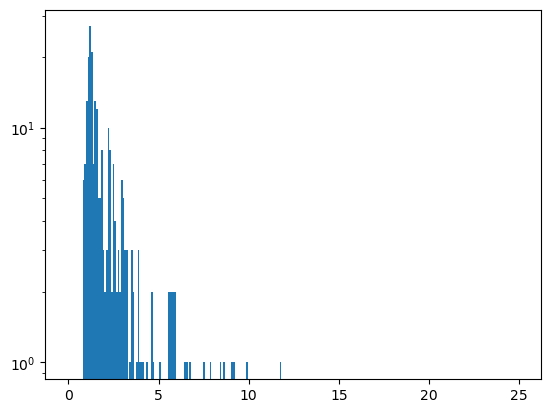

In [51]:
plt.bar(time_array, pixel, width = time_step)
plt.yscale('log')

In [52]:
pixel

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  6,  7, 13, 20, 27, 21,  7, 13,
       12,  5,  5,  8,  3,  2,  3, 10,  8,  2,  7,  4,  2,  3,  2,  6,  5,
        3,  3,  0,  1,  3,  2,  0,  1,  3,  1,  1,  1,  0,  1,  0,  0,  2,
        1,  0,  0,  0,  1,  0,  0,  0,  0,  2,  2,  2,  2,  2,  0,  0,  0,
        0,  0,  1,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
        1,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  1,  1,  0,  0,
        0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

## plotting decay curves from ROIs

Text(0.5, 1.0, 'Lifetime decay curve from selected ROI')

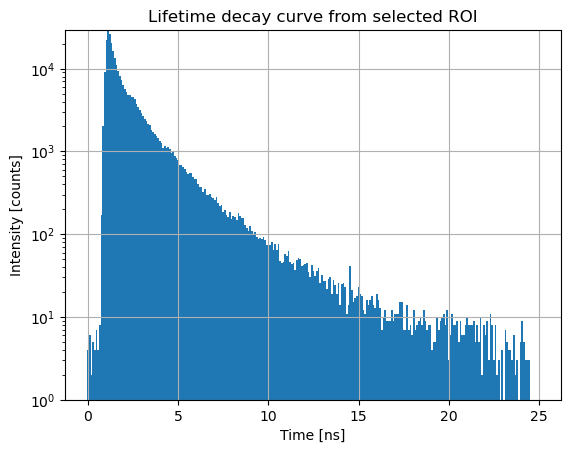

In [53]:
##### user input of ROI
# e.g.: 300-330 and 180-220
#ROIx_start = input('ROI x start: \n')
#ROIx_end = input('ROI x end: \n')
#ROIy_start = input('ROI y start: \n')
#ROIy_end = input('ROI y end: \n')
ROI = flim_data_stack_for_napari[:, 120:150, 280:320]  # define ROI
ROI_2 = flim_data_stack_for_napari[:, 20:50, 150:200]  # define ROI
ROI_accum_counts = np.sum(ROI, axis = (1,2))
plt.bar(time_array, ROI_accum_counts, width = time_step)
plt.yscale('log')
plt.ylim((1,max(ROI_accum_counts)))
plt.xlabel('Time [ns]')
plt.ylabel('Intensity [counts]')
plt.grid(True)
plt.title('Lifetime decay curve from selected ROI')

In [54]:
## Combination of intensity image and lifetime decay bar plots

In [55]:
# DEFINITION OF ROI:

# a) user input of ROI
# e.g.: 300-330 and 180-220
#ROIx_start = input('ROI x start: \n')
#ROIx_end = input('ROI x end: \n')
#ROIy_start = input('ROI y start: \n')
#ROIy_end = input('ROI y end: \n')
# to be done: crop image according to variables

# b) crop ROI in one go:
ROI = flim_data_stack_for_napari[:, 120:150, 280:320]  # define ROI
ROI_accum_counts = np.sum(ROI, axis = (1,2))           # add up photon counts across all pixels in ROI
#ROI_accum_counts.shape

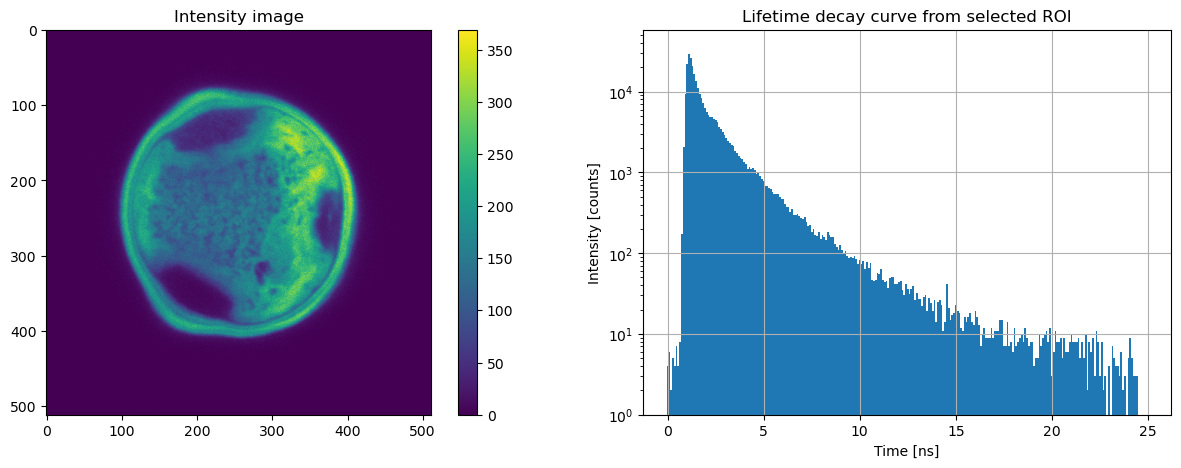

In [56]:
plt.figure (1, figsize=(15,5))

plt.subplot(121)
plt.imshow(intensity_image)
plt.title('Intensity image')
# rect = patches.Rectangle((120, 150), 280, 320, linewidth=1, edgecolor='r', facecolor='none')
# plt.add_patch(rect)
plt.colorbar()

plt.subplot(122)
plt.bar(time_array, ROI_accum_counts, width = time_step)
plt.yscale('log')
plt.ylim((1,max(ROI_accum_counts)*2))
plt.xlabel('Time [ns]')
plt.ylabel('Intensity [counts]')
plt.grid(True)
plt.title('Lifetime decay curve from selected ROI')

plt.show()

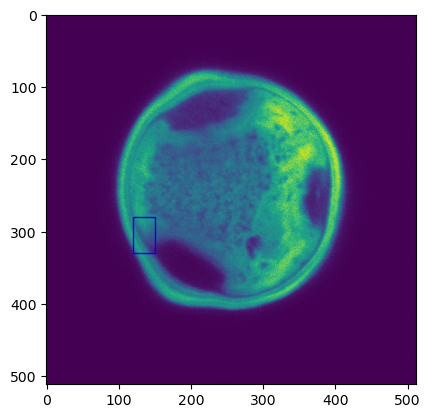

In [61]:
import matplotlib.patches as patches
fig, ax = plt.subplots()
ax.imshow(intensity_image)

# Create a Rectangle patch
rect = patches.Rectangle((120, 280), 30, 50, linewidth=1, edgecolor='b', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()
#plt.imshow(intensity_image)
#plt.colorbar()
# plt.add_patch(rect)

In [ ]:
A = np.arange(24).reshape((2,3,4))
A 

In [ ]:
np.sum(A, axis = (1,2))

In [ ]:
A.shape

In [ ]:
np.mean(A, axis = (1,2))